决策树实战task：
1、基于iris_data.csv数据，建立决策树模型，评估模型表现
2、可视化决策树结构
3、修改min_samples_leaf参数，对比模型结果

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [5]:
# define X, y
X = data.drop(['target', 'label'], axis = 1)
y = data.loc[:,'label']
print(X.shape, y.shape)

(150, 4) (150,)


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
# 建立决策树模型
from sklearn import tree

dc_tree = tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)

dc_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [15]:
# 评估模型标签
y_predict = dc_tree.predict(X)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

1.0


[Text(558.0, 996.6, 'PetalWidth <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(472.15384615384613, 815.4000000000001, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(643.8461538461538, 815.4000000000001, 'PetalWidth <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(343.38461538461536, 634.2, 'PetalLength <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(171.69230769230768, 453.0, 'PetalWidth <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(85.84615384615384, 271.79999999999995, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(257.53846153846155, 271.79999999999995, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(515.0769230769231, 453.0, 'PetalWidth <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(429.23076923076917, 2

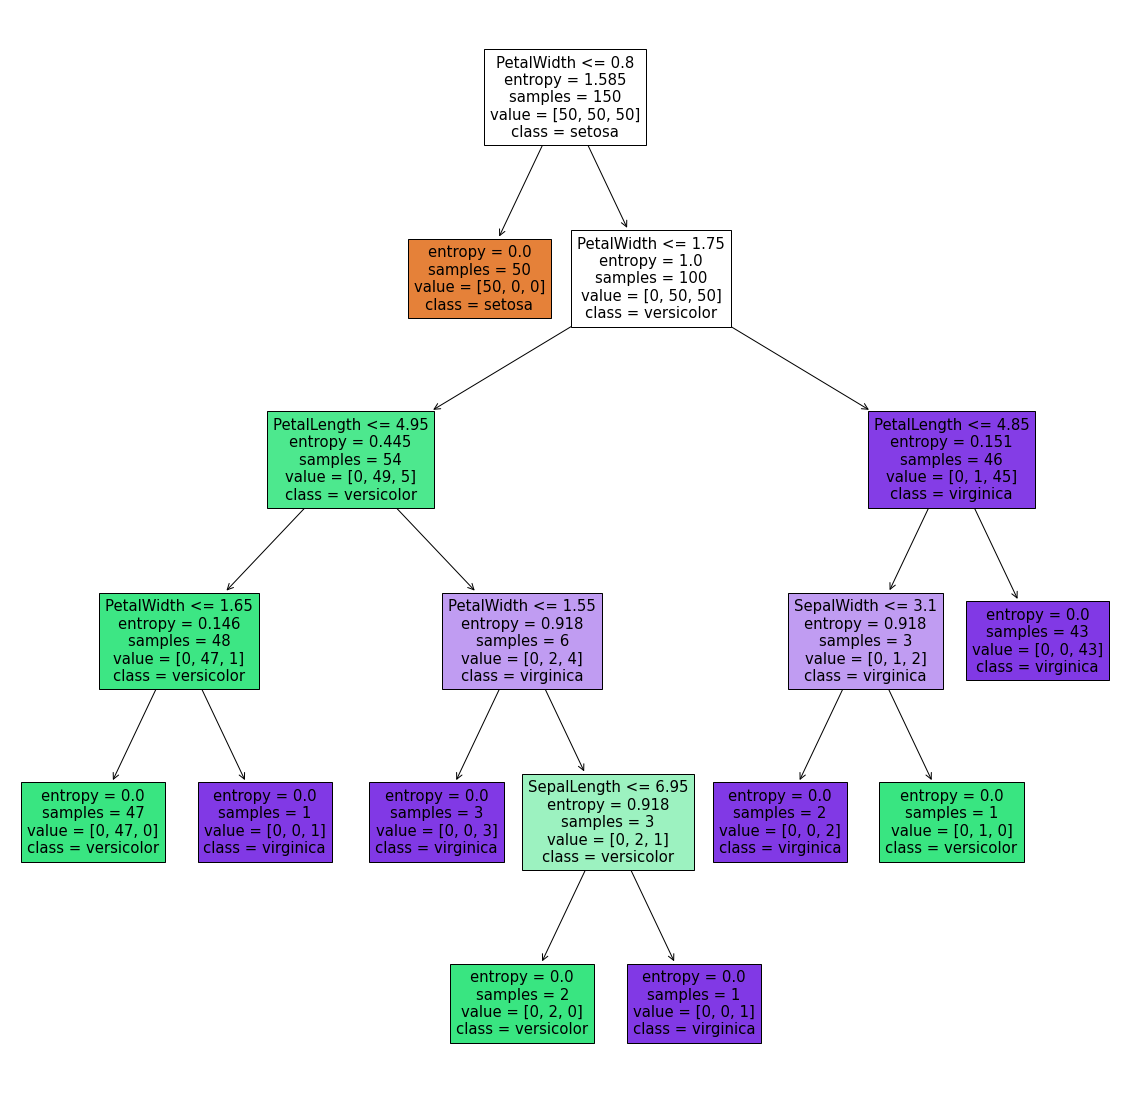

In [17]:
# 画图展示
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 20))
# dc_tree 模型
# filled 增加背景填充色
# feature_names 对应属性名称
# 对应分类名称
tree.plot_tree(dc_tree,
               filled='True',
               feature_names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'],
               class_names=['setosa','versicolor','virginica']
              )